In [42]:
# Setup environment
# !apt-get -qq install xxd
!sudo apt-get update -y
!sudo apt-get install -y xxd
!pip install pandas numpy matplotlib
%tensorflow_version 2.x
!pip install tensorflow

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graph

In [43]:
import os
import fileinput
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import Dense,LSTM,Dropout

In [44]:
#Setting the Seed
SEED = 1707
np.random.seed(SEED)
tf.random.set_seed(SEED)

op_classes = [];

#Reading the CSV Files of the data
for file in os.listdir("/content/"):
    if file.endswith(".csv"):
        op_classes.append(os.path.splitext(file)[0])
        
op_classes.sort()

window_len = 1
n_op_classes = len(op_classes)

#one-hot encoded matrix
encoded_op_classes = np.eye(n_op_classes)

x = []
y = []

# reading each csv file and removing NaN values
for class_index in range(n_op_classes):
  objectClass = op_classes[class_index]
  df = pd.read_csv("/content/" + objectClass + ".csv")
  columns = list(df)
  df = df.dropna()
  df = df.reset_index(drop=True)
   
  # calculate the number of objectClass recordings in the file
  num_recordings = int(df.shape[0] / window_len)
  print(f"\u001b[32;4m{objectClass}\u001b[0m class will be output \u001b[32m{class_index}\u001b[0m of the classifier")
  print(f"{num_recordings} samples captured for training with x {list(df)} \n")

  #tensors
  output = encoded_op_classes[class_index]
  for i in range(num_recordings):
    tensor = []
    row = []
    for c in columns:
      row.append(df[c][i])
    tensor += row
    x.append(tensor)
    y.append(output)

x = np.array(x)
y = np.array(y)

print("Data set parsing and preparation complete.")

num_x = len(x)
randomize = np.arange(num_x)
np.random.shuffle(randomize)

x = x[randomize]
y = y[randomize]

# Split the recordings for training, testing and validation
train = int(0.6 * num_x)
test = int(0.2 * num_x + train)

x_train, x_test, x_validate = np.split(x, [train, test])
y_train, y_test, y_validate = np.split(y, [train, test])

print("Data set randomization and splitting complete.")

Cable Curl_numSamples_20_threshold_0.1_delay_0.2 class will be output 0 of the classifier
1000 samples captured for training with inputs ['acc.x', 'acc.y', 'acc.z', 'gyro.x', 'gyro.y', 'gyro.z'] 

Dumbell bicep curl_numSamples_20_threshold_0.1_delay_0.2 class will be output 1 of the classifier
1000 samples captured for training with inputs ['acc.x', 'acc.y', 'acc.z', 'gyro.x', 'gyro.y', 'gyro.z'] 

Kick Back_numSamples_20_threshold_0.1_delay_0.2 class will be output 2 of the classifier
1000 samples captured for training with inputs ['acc.x', 'acc.y', 'acc.z', 'gyro.x', 'gyro.y', 'gyro.z'] 

Lat Pulldown_numSamples_20_threshold_0.1_delay_0.2 class will be output 3 of the classifier
1000 samples captured for training with inputs ['acc.x', 'acc.y', 'acc.z', 'gyro.x', 'gyro.y', 'gyro.z'] 

Pec Fly_numSamples_20_threshold_0.1_delay_0.2 class will be output 4 of the classifier
1000 samples captured for training with inputs ['acc.x', 'acc.y', 'acc.z', 'gyro.x', 'gyro.y', 'gyro.z'] 

Reverse P

In [55]:
# building the fully connected network model and training it
fcn = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(8, activation='relu'))
fcn.add(tf.keras.layers.Dense(16, activation='relu'))
fcn.add(tf.keras.layers.Dense(8, activation='relu')) 
fcn.add(tf.keras.layers.Dense(5, activation='relu'))
fcn.add(tf.keras.layers.Dense(n_op_classes, activation='softmax'))
fcn.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history = fcn.fit(inputs_train, outputs_train, epochs=400, batch_size=4, validation_data=(inputs_validate, outputs_validate))

Epoch 1/400
900/900 [==============================] - 3s 3ms/step - loss: 0.1190 - accuracy: 0.3814 - val_loss: 0.0942 - val_accuracy: 0.5792
Epoch 2/400
900/900 [==============================] - 3s 4ms/step - loss: 0.0783 - accuracy: 0.6525 - val_loss: 0.0637 - val_accuracy: 0.7592
Epoch 3/400
900/900 [==============================] - 3s 3ms/step - loss: 0.0562 - accuracy: 0.8033 - val_loss: 0.0467 - val_accuracy: 0.8600
Epoch 4/400
900/900 [==============================] - 2s 2ms/step - loss: 0.0443 - accuracy: 0.8531 - val_loss: 0.0386 - val_accuracy: 0.8592
Epoch 5/400
900/900 [==============================] - 2s 2ms/step - loss: 0.0380 - accuracy: 0.8650 - val_loss: 0.0352 - val_accuracy: 0.8658
Epoch 6/400
900/900 [==============================] - 2s 2ms/step - loss: 0.0345 - accuracy: 0.8678 - val_loss: 0.0315 - val_accuracy: 0.8825
Epoch 7/400
900/900 [==============================] - 2s 2ms/step - loss: 0.0319 - accuracy: 0.8750 - val_loss: 0.0294 - val_accuracy: 0.8917

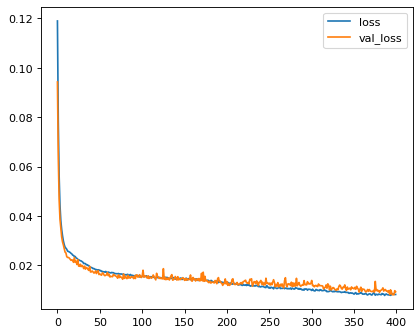

In [64]:
figure(figsize=(6, 5), dpi=80)
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

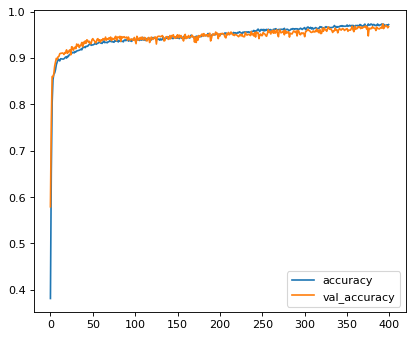

In [65]:
figure(figsize=(6, 5), dpi=80)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [66]:
preds = fcn.predict(x_test)

# printing the predictions and the expected ouputs
print("predictions =\n", np.round(pred[2]))
print("actual =\n", y_test[2])

correct_count = 0

for i in range(len(pred)):
  label = np.argmax(pred[i])
  if y_test[i][label] == 1:
    correct_count += 1

print("No. of samples correctly classified:",correct_count)
print("Accuracy of the Model:",correct_count*100/len(y_test))

predictions =
 [1. 0. 0. 0. 0. 0.]
actual =
 [1. 0. 0. 0. 0. 0.]
No. of samples correctly classified: 1171
Accuracy of the Model: 97.58333333333333


In [67]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(fcn)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)

INFO:tensorflow:Assets written to: /tmp/tmpcc8zwyhs/assets


INFO:tensorflow:Assets written to: /tmp/tmpcc8zwyhs/assets


Model is 3588 bytes


In [68]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat gesture_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 22,160 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.


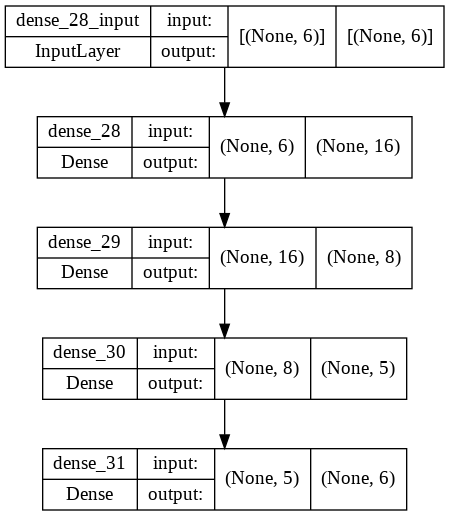

In [69]:
from tensorflow.keras.utils import plot_model
plot_model(fcn, to_file='model.png', show_shapes=True, show_layer_names=True)

In [70]:
!pip install ann_visualizer
!pip install graphviz

In [71]:
from ann_visualizer.visualize import ann_viz;
ann_viz(fcn, title="Neural Network Model")